In [24]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [26]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [27]:
X_train = X_train/ 255.0
X_test = X_test/255.0
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

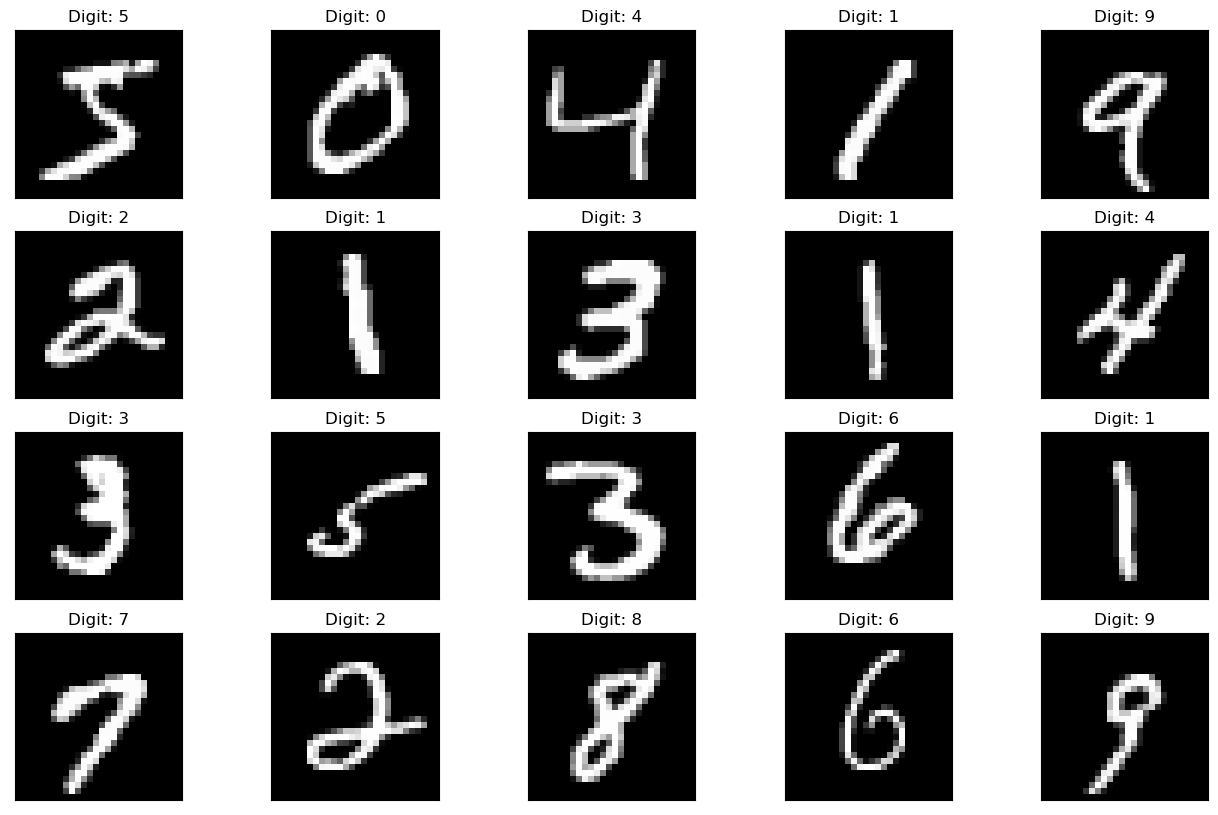

In [28]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [6]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [7]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [8]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])

In [9]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer,
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [10]:
history=model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.2441 - accuracy: 0.9270 - val_loss: 0.0965 - val_accuracy: 0.9703
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0830 - accuracy: 0.9752 - val_loss: 0.0696 - val_accuracy: 0.9784
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0551 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0505 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0478 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0489 - val_accuracy

1/1 [==============================] - 0s 22ms/step


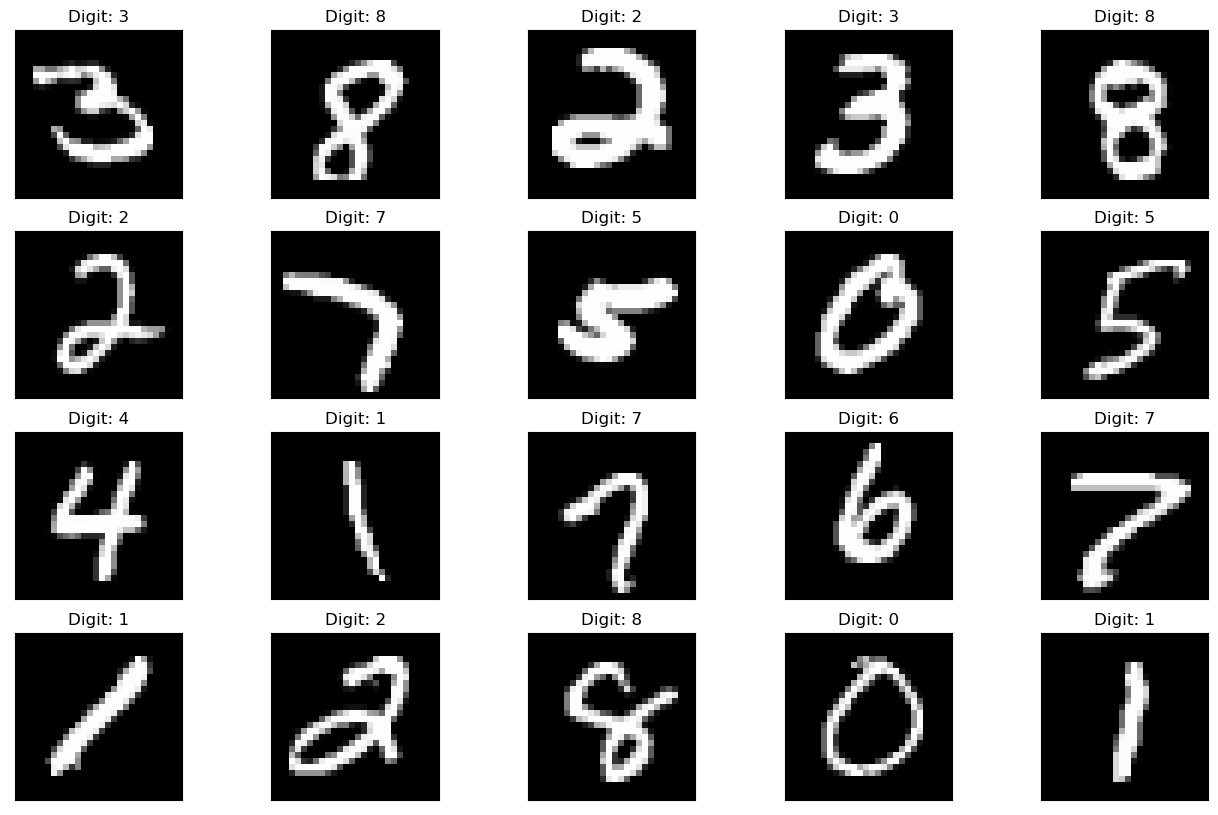

In [11]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [18]:
predictions=np.argmax(model.predict(X_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [19]:
accuracy_score(y_test, predictions)

0.9869

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.04668661952018738
Test accuracy: 0.9868999719619751


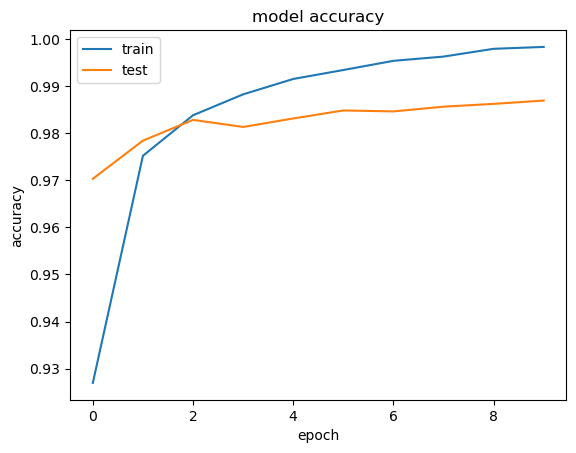

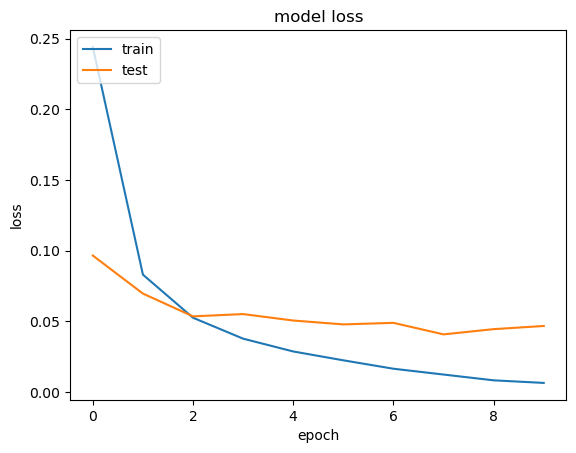

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
 json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
